## 데이터 전처리

### 수치형
사상자수, 사망자수, 중상자수, 경상자수, 부상신고자수

### 범주형
주야, 요일, 발생지시도, 발생지시군구, 
사고유형_대분류, 사고유형_중분류, 법규위반, 도로형태_대분류,
도로형태, 당사자종별_1당_대분류, 당사자종별_2당_대분류

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OneHotEncoder, MultiLabelBinarizer

In [2]:
categorical = ['주야', '요일', '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '법규위반', 
            '도로형태_대분류', '도로형태', '당사자종별_1당_대분류', '당사자종별_2당_대분류']
numerical = ['사상자수', '사망자수', '중상자수', '경상자수','부상신고자수']
x_train_num = pd.read_csv('./교통사망사고정보/Kor_Train_교통사망사고정보(12.1~17.6).csv',encoding='cp949', 
                              usecols=numerical)

x_train_cat = pd.read_csv('./교통사망사고정보/Kor_Train_교통사망사고정보(12.1~17.6).csv',encoding='cp949',
                               usecols=categorical)


In [3]:
x_test_num = pd.read_csv('./test_kor.csv',encoding='cp949', 
                              usecols=numerical)

x_test_cat = pd.read_csv('./test_kor.csv',encoding='cp949',
                               usecols=categorical)

In [4]:
x_train_num.describe()

,사망자수,사상자수,중상자수,경상자수,부상신고자수
count,25037.000000,25037.00000,25037.000000,25037.000000,25037.000000
mean,1.040899,1.62152,0.299996,0.250509,0.030115
std,0.252493,2.05103,1.052157,1.145349,0.541728
min,1.000000,1.00000,0.000000,0.000000,0.000000
25%,1.000000,1.00000,0.000000,0.000000,0.000000
50%,1.000000,1.00000,0.000000,0.000000,0.000000
75%,1.000000,2.00000,0.000000,0.000000,0.000000
max,10.000000,100.00000,54.000000,62.000000,67.000000


In [5]:
x_train_cat.describe()

,주야,요일,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_2당_대분류
count,25037,25037,25037,25037,25037,25037,25037,25037,25037,25037,25037
unique,2,7,17,208,4,19,20,9,16,12,14
top,야간,금,경기,서구,차대차,기타,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자
freq,12913,3714,4728,493,9857,5847,17741,16746,15011,12374,9784


In [6]:
x_test_num.describe()

,사망자수,사상자수,중상자수,경상자수,부상신고자수
count,41.000000,33.000000,36.000000,42.000000,48.000000
mean,1.170732,3.636364,0.833333,1.785714,0.312500
std,0.380949,4.181942,1.715476,4.027562,1.545842
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,0.000000,0.000000,0.000000
75%,1.000000,4.000000,1.000000,1.000000,0.000000
max,2.000000,19.000000,9.000000,21.000000,10.000000


In [7]:
x_test_cat.describe()

,주야,요일,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_2당_대분류
count,45,45,45,40,38,35,37,37,37,41,43
unique,2,7,14,37,3,9,8,2,5,8,8
top,주간,화,경기,평택시,차대차,추돌,안전운전 의무 불이행,단일로,기타단일로,승용차,화물차
freq,24,12,8,3,25,11,22,24,24,19,11


### One Hot Encdoing을 나열해서 만드는 방법

In [8]:
all_data = pd.concat((x_test_cat.dropna(),x_train_cat))
for col in all_data.select_dtypes(include=[np.object]).columns:
    print(col, all_data[col].unique())

주야 ['야간' '주간']
요일 ['금' '월' '일' '목' '수' '화' '토']
발생지시도 ['경기' '전남' '대구' '경북' '충남' '강원' '충북' '서울' '광주' '부산' '경남' '인천' '세종' '전북'
 '대전' '울산' '제주']
발생지시군구 ['화성시' '영암군' '곡성군' '달성군' '고흥군' '영천시' '아산시' '서천군' '평창군' '음성군' '성남시' '서산시'
 '서구' '영등포구' '용인시' '광양시' '광산구' '중구' '원주시' '고양시' '논산시' '동구' '고성군' '안산시'
 '목포시' '강서구' '시흥시' '이천시' '사상구' '광진구' '서대문구' '양평군' '남양주시' '동작구' '기장군' '예산군'
 '남구' '여수시' '제천시' '세종' '춘천시' '의성군' '충주시' '서초구' '금산군' '밀양시' '김천시' '군산시'
 '대덕구' '파주시' '진주시' '김해시' '북구' '나주시' '고창군' '합천군' '무주군' '계양구' '함양군' '안동시'
 '인제군' '사하구' '철원군' '강동구' '홍성군' '안양시' '정선군' '용산구' '구미시' '부산진구' '광명시' '송파구'
 '평택시' '남원시' '함안군' '서귀포시' '경산시' '정읍시' '청주시' '상주시' '삼척시' '강릉시' '양산시' '제주시'
 '달서구' '영덕군' '여주시' '장성군' '전주시' '청도군' '포항시' '마포구' '영광군' '영주시' '도봉구' '당진시'
 '부천시' '수성구' '봉화군' '익산시' '구로구' '유성구' '금천구' '천안시' '진도군' '가평군' '강화군' '거창군'
 '군위군' '부평구' '양주시' '사천시' '의정부시' '영동군' '광주시' '창원시(통합)' '울주군' '진천군' '김포시'
 '동래구' '강남구' '보령시' '강진군' '보성군' '화순군' '순천시' '보은군' '양양군' '군포시' '청송군' '통영시'
 '수원시' '경주시' '하남시' '완주군' '양천구' '함평군' '의령군' '공주시' '

In [9]:
for column in all_data.select_dtypes(include=[np.object]).columns:
    x_train_cat[column] = x_train_cat[column].astype('category', categories = all_data[column].unique())
    x_test_cat[column] = x_test_cat[column].astype('category', categories = all_data[column].unique())

/home/iron/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  
/home/iron/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
x_train_cat = pd.get_dummies(data=x_train_cat)
x_test_cat = pd.get_dummies(data=x_test_cat)

In [11]:
print(x_train_cat.shape)
print(x_test_cat.shape)

(25037, 328)
(50, 328)


# Deep Learning

In [236]:
import keras
from keras.layers import Dense, Input, LSTM, concatenate, Dropout, Conv2D, MaxPool2D, Embedding, Reshape, Conv1D
from keras.models import Sequential, Model
from keras.utils import np_utils
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from keras import metrics

In [13]:
print(x_train_cat.shape)
print(x_train_num.shape)
print(x_test_cat.shape)
print(x_test_num.shape)

(25037, 328)
(25037, 5)
(50, 328)
(50, 5)


In [14]:
Case1 = ['사망자수','사상자수','경상자수']
Case2 = ['사상자수', '중상자수', '부상신고자수']

### Case 1
'사망자수','사상자수','경상자수' 예측

In [79]:
Y = x_train_num[['사망자수','경상자수']].values
X = x_train_num.drop(columns=['사망자수','사상자수','경상자수'])

In [80]:
print(X.index)
print(x_train_cat.index)
if X.index.all() == x_train_cat.index.all():
    print(True)
else:
    print(False)

RangeIndex(start=0, stop=25037, step=1)
RangeIndex(start=0, stop=25037, step=1)
True


In [81]:
# X = X.reset_index(drop=True)
# x_train_cat = x_train_cat.reset_index(drop=True)

In [82]:
X = pd.concat([X, x_train_cat], axis=1).values

In [83]:
X.shape

(25037, 330)

Test Data 생성

In [84]:
X_test = x_test_num.drop(columns=['사망자수','사상자수','경상자수'])
# X_test = X_test.reset_index(drop=True)
# x_test_cat = x_test_cat.reset_index(drop=True)
X_test = pd.concat([X_test, x_test_cat],axis=1).values

In [85]:
print(X.shape)
print(Y.shape)

(25037, 330)
(25037, 2)


In [86]:
num_input = Input(shape=(len(X[0]),), name='num_input')
x = Dense(512, activation='relu')(num_input)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
num_output = Dense(len(Y[0]), name='num_output')(x)

In [87]:
model = Model(inputs=num_input, outputs=num_output)

In [88]:
model.compile(optimizer='sgd',
              loss='mse',
              metrics=['accuracy'])

In [89]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=25, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00000001)

callbacks = [
    learning_rate_reduction, # learning_rate를 점차 감소시킴으로서 최적값에 접근하는 방식
                                        # approach to get optimal value by gradually decreasing learning_rate
    EarlyStopping('val_loss', patience=10), # val_loss이 최적값에서 멀어지는 순간 epoch가 남아도 학습 중지
                                                            # If val_loss deviates from the optimal value, 
                                                            # learning stops even if epoch remains.
    ModelCheckpoint('model.h5', save_best_only=True)] # 모델을 학습시키면서 지금까지 등장했던 최적의 weight들을 항상 저장한다.

In [90]:
history = model.fit(X, Y, epochs=50, batch_size=128, callbacks=callbacks,validation_split=0.2 )

Train on 20029 samples, validate on 5008 samples
Epoch 1/50
20029/20029 [==============================] - 1s 43us/step - loss: 0.7141 - acc: 0.9326 - val_loss: 0.6196 - val_acc: 0.9557
Epoch 2/50
20029/20029 [==============================] - 1s 28us/step - loss: 0.6220 - acc: 0.9554 - val_loss: 0.5763 - val_acc: 0.9405
Epoch 3/50
20029/20029 [==============================] - 1s 28us/step - loss: 0.6033 - acc: 0.9492 - val_loss: 0.5658 - val_acc: 0.9383
Epoch 4/50
20029/20029 [==============================] - 1s 28us/step - loss: 0.6169 - acc: 0.9471 - val_loss: 0.5683 - val_acc: 0.9401
Epoch 5/50
20029/20029 [==============================] - 1s 28us/step - loss: 0.5962 - acc: 0.9480 - val_loss: 0.5575 - val_acc: 0.9391
Epoch 6/50
20029/20029 [==============================] - 1s 27us/step - loss: 0.5949 - acc: 0.9454 - val_loss: 0.5547 - val_acc: 0.9393
Epoch 7/50
20029/20029 [==============================] - 1s 28us/step - loss: 0.5896 - acc: 0.9474 - val_loss: 0.5464 - val_acc:

In [91]:
# make a prediction
Y_test = model.predict(X_test[0:2])
# Y_test = model.predict(X[0:2])

# show the inputs and predicted outputs
print("X=%s, Predicted=%s" % (X_test[0:2],  Y_test ))

X=[[0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0

### Case 2

'사상자수', '중상자수', '부상신고자수' 예측

In [219]:
Y = x_train_num[['사상자수', '중상자수', '부상신고자수']].values
X = x_train_num.drop(columns=['사상자수', '중상자수', '부상신고자수'])

In [220]:
X = X.reset_index(drop=True)
x_train_cat = x_train_cat.reset_index(drop=True)

In [221]:
X = pd.concat([X, x_train_cat], axis=1).values

Test Data 생성

In [222]:
X_test = x_test_num.drop(columns=['사상자수', '중상자수', '부상신고자수'])
X_test = X_test.reset_index(drop=True)
x_test_cat = x_test_cat.reset_index(drop=True)
X_test = pd.concat([X_test, x_test_cat],axis=1).values

In [231]:
X_test

array([[nan, nan,  1., ...,  0.,  0.,  0.],
       [nan, nan,  1., ...,  0.,  0.,  0.],
       [ 1.,  0.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 2.,  9.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.]])

In [223]:
print(X.shape)
print(Y.shape)

(25037, 330)
(25037, 3)


In [242]:
num_input = Input(shape=(len(X[0]),), name='num_input')
x = Dense(512, activation='relu')(num_input)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
num_output = Dense(len(Y[0]), name='num_output')(x)

In [243]:
model = Model(inputs=num_input, outputs=num_output)

In [244]:
model.compile(optimizer='sgd',
              loss='mse',
              metrics=['accuracy'])

In [245]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=25, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00000001)

callbacks = [
    learning_rate_reduction, # learning_rate를 점차 감소시킴으로서 최적값에 접근하는 방식
                                        # approach to get optimal value by gradually decreasing learning_rate
    EarlyStopping('val_loss', patience=10), # val_loss이 최적값에서 멀어지는 순간 epoch가 남아도 학습 중지
                                                            # If val_loss deviates from the optimal value, 
                                                            # learning stops even if epoch remains.
    ModelCheckpoint('model.h5', save_best_only=True)] # 모델을 학습시키면서 지금까지 등장했던 최적의 weight들을 항상 저장한다.

In [246]:
history = model.fit(X, Y, epochs=50, batch_size=128, callbacks=callbacks,validation_split=0.2 )

Train on 20029 samples, validate on 5008 samples
Epoch 1/50
20029/20029 [==============================] - 1s 37us/step - loss: 1.1353 - acc: 0.9906 - val_loss: 1.3231 - val_acc: 1.0000
Epoch 2/50
20029/20029 [==============================] - 1s 27us/step - loss: 0.9941 - acc: 1.0000 - val_loss: 1.5311 - val_acc: 1.0000
Epoch 3/50
20029/20029 [==============================] - 1s 28us/step - loss: 0.8412 - acc: 1.0000 - val_loss: 1.2721 - val_acc: 1.0000
Epoch 4/50
20029/20029 [==============================] - 1s 28us/step - loss: 0.7906 - acc: 1.0000 - val_loss: 1.5489 - val_acc: 1.0000
Epoch 5/50
20029/20029 [==============================] - 1s 27us/step - loss: 0.8055 - acc: 1.0000 - val_loss: 1.2552 - val_acc: 1.0000
Epoch 6/50
20029/20029 [==============================] - 1s 27us/step - loss: 0.7961 - acc: 1.0000 - val_loss: 1.2185 - val_acc: 1.0000
Epoch 7/50
20029/20029 [==============================] - 1s 27us/step - loss: 0.8144 - acc: 1.0000 - val_loss: 1.1873 - val_acc:

In [247]:
# make a prediction
Y_test = model.predict(X_test[2:4])
# Y_test = model.predict(X[0:2])

# show the inputs and predicted outputs
print("X=%s, Predicted=%s" % (X_test[2:4],  Y_test ))

X=[[1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0

### Case 3
'사상자수', '중상자수', '경상자수' 예측

In [34]:
Y = x_train_num[['사상자수', '중상자수', '경상자수']].values
X = x_train_num.drop(columns=['사상자수', '중상자수', '경상자수'])

In [35]:
X = pd.concat([X, x_train_cat], axis=1).values

Test Data 생성

In [36]:
X_test = x_test_num.drop(columns=['사상자수', '중상자수', '경상자수'])
X_test = pd.concat([X_test, x_test_cat],axis=1).values

In [37]:
print(X.shape)
print(Y.shape)

(25037, 330)
(25037, 3)


In [38]:
num_input = Input(shape=(len(X[0]),), name='num_input')
x = Dense(512, activation='relu')(num_input)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
num_output = Dense(len(Y[0]), name='num_output')(x)

In [39]:
model = Model(inputs=num_input, outputs=num_output)

In [40]:
model.compile(optimizer='sgd',
              loss='mse',
              metrics=['accuracy'])

In [41]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=25, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00000001)

callbacks = [
    learning_rate_reduction, # learning_rate를 점차 감소시킴으로서 최적값에 접근하는 방식
                                        # approach to get optimal value by gradually decreasing learning_rate
    EarlyStopping('val_loss', patience=10), # val_loss이 최적값에서 멀어지는 순간 epoch가 남아도 학습 중지
                                                            # If val_loss deviates from the optimal value, 
                                                            # learning stops even if epoch remains.
    ModelCheckpoint('model.h5', save_best_only=True)] # 모델을 학습시키면서 지금까지 등장했던 최적의 weight들을 항상 저장한다.

In [42]:
history = model.fit(X, Y, epochs=50, batch_size=128, callbacks=callbacks,validation_split=0.2 )

Train on 20029 samples, validate on 5008 samples
Epoch 1/50
20029/20029 [==============================] - 1s 36us/step - loss: 2.1094 - acc: 0.9922 - val_loss: 2.1658 - val_acc: 1.0000
Epoch 2/50
20029/20029 [==============================] - 1s 28us/step - loss: 1.8946 - acc: 1.0000 - val_loss: 1.8385 - val_acc: 1.0000
Epoch 3/50
20029/20029 [==============================] - 1s 27us/step - loss: 1.8123 - acc: 1.0000 - val_loss: 1.8323 - val_acc: 1.0000
Epoch 4/50
20029/20029 [==============================] - 1s 27us/step - loss: 1.7215 - acc: 1.0000 - val_loss: 1.7207 - val_acc: 1.0000
Epoch 5/50
20029/20029 [==============================] - 1s 27us/step - loss: 1.6523 - acc: 1.0000 - val_loss: 1.7731 - val_acc: 1.0000
Epoch 6/50
20029/20029 [==============================] - 1s 27us/step - loss: 1.6442 - acc: 1.0000 - val_loss: 1.5930 - val_acc: 1.0000
Epoch 7/50
20029/20029 [==============================] - 1s 30us/step - loss: 1.5781 - acc: 1.0000 - val_loss: 1.6481 - val_acc:

In [43]:
# make a prediction
Y_test = model.predict(X_test[4:7])

# show the inputs and predicted outputs
print("X=%s, Predicted=%s" % (X_test[4:7],  Y_test ))

X=[[1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0

### Case 4
'사망자수', '사상자수', '중상자수' 예측

In [67]:
Y = x_train_num[['사망자수', '중상자수']].values
X = x_train_num.drop(columns=['사망자수', '사상자수', '중상자수'])

In [68]:
X = pd.concat([X, x_train_cat], axis=1).values

Test Data 생성

In [77]:
X_test = x_test_num.drop(columns=['사망자수', '사상자수', '중상자수'])
X_test = pd.concat([X_test, x_test_cat],axis=1).values

In [70]:
print(X.shape)
print(Y.shape)

(25037, 330)
(25037, 2)


In [71]:
num_input = Input(shape=(len(X[0]),), name='num_input')
x = Dense(512, activation='relu')(num_input)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
num_output = Dense(len(Y[0]), name='num_output')(x)

In [72]:
model = Model(inputs=num_input, outputs=num_output)

In [73]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

In [74]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=25, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00000001)

callbacks = [
    learning_rate_reduction, # learning_rate를 점차 감소시킴으로서 최적값에 접근하는 방식
                                        # approach to get optimal value by gradually decreasing learning_rate
    EarlyStopping('val_loss', patience=10), # val_loss이 최적값에서 멀어지는 순간 epoch가 남아도 학습 중지
                                                            # If val_loss deviates from the optimal value, 
                                                            # learning stops even if epoch remains.
    ModelCheckpoint('model.h5', save_best_only=True)] # 모델을 학습시키면서 지금까지 등장했던 최적의 weight들을 항상 저장한다.

In [75]:
history = model.fit(X, Y, epochs=50, batch_size=128, callbacks=callbacks,validation_split=0.2 )

Train on 20029 samples, validate on 5008 samples
Epoch 1/50
20029/20029 [==============================] - 1s 52us/step - loss: 0.5541 - acc: 0.9251 - val_loss: 0.5070 - val_acc: 0.9303
Epoch 2/50
20029/20029 [==============================] - 1s 38us/step - loss: 0.4962 - acc: 0.9276 - val_loss: 0.4655 - val_acc: 0.9139
Epoch 3/50
20029/20029 [==============================] - 1s 35us/step - loss: 0.4760 - acc: 0.9297 - val_loss: 0.4747 - val_acc: 0.9119
Epoch 4/50
20029/20029 [==============================] - 1s 35us/step - loss: 0.4676 - acc: 0.9303 - val_loss: 0.4840 - val_acc: 0.9333
Epoch 5/50
20029/20029 [==============================] - 1s 35us/step - loss: 0.4243 - acc: 0.9336 - val_loss: 0.6673 - val_acc: 0.9247
Epoch 6/50
20029/20029 [==============================] - 1s 35us/step - loss: 0.4054 - acc: 0.9410 - val_loss: 0.6006 - val_acc: 0.9058
Epoch 7/50
20029/20029 [==============================] - 1s 38us/step - loss: 0.3551 - acc: 0.9414 - val_loss: 0.6155 - val_acc:

In [78]:
# make a prediction
Y_test = model.predict(X_test[7:10])

# show the inputs and predicted outputs
print("X=%s, Predicted=%s" % (X_test[7:10],  Y_test ))

X=[[ 5.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  1.  0.  0.  0.  0.  0.  0

### Case 5
'사고유형_대분류', '사고유형_중분류', '법규위반'예측

In [131]:


col_name = []
for col in ['사고유형_대분류', '사고유형_중분류', '법규위반']:
        for name in all_data[col].unique():
            col_name.append(col+'_'+name)

Y = x_train_cat[col_name].values
X = x_train_cat.drop(columns=col_name)
X = pd.concat([X, x_train_num], axis=1).values

X_test = x_test_cat.drop(columns=col_name)
X_test = pd.concat([X_test, x_test_num],axis=1).values

print(X.shape)
print(Y.shape)

cat_input = Input(shape=(len(X[0]),), name='cat_input')
x = Dense(512, activation='relu')(cat_input)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
cat_output = Dense(len(Y[0]), activation='sigmoid', name='cat_output')(x)

model = Model(inputs=cat_input, outputs=cat_output)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=25, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00000001)

callbacks = [
    learning_rate_reduction, # learning_rate를 점차 감소시킴으로서 최적값에 접근하는 방식
                                        # approach to get optimal value by gradually decreasing learning_rate
    EarlyStopping('val_loss', patience=10), # val_loss이 최적값에서 멀어지는 순간 epoch가 남아도 학습 중지
                                                            # If val_loss deviates from the optimal value, 
                                                            # learning stops even if epoch remains.
    ModelCheckpoint('model.h5', save_best_only=True)] # 모델을 학습시키면서 지금까지 등장했던 최적의 weight들을 항상 저장한다.

history = model.fit(X, Y, epochs=50, batch_size=128, callbacks=callbacks,validation_split=0.2 )



(25037, 290)
(25037, 43)
Train on 20029 samples, validate on 5008 samples
Epoch 1/50
20029/20029 [==============================] - 1s 50us/step - loss: 0.1419 - acc: 0.9480 - val_loss: 0.0803 - val_acc: 0.9672
Epoch 2/50
20029/20029 [==============================] - 1s 39us/step - loss: 0.0866 - acc: 0.9647 - val_loss: 0.0775 - val_acc: 0.9684
Epoch 3/50
20029/20029 [==============================] - 1s 36us/step - loss: 0.0820 - acc: 0.9664 - val_loss: 0.0769 - val_acc: 0.9682
Epoch 4/50
20029/20029 [==============================] - 1s 36us/step - loss: 0.0800 - acc: 0.9672 - val_loss: 0.0772 - val_acc: 0.9681
Epoch 5/50
20029/20029 [==============================] - 1s 37us/step - loss: 0.0781 - acc: 0.9681 - val_loss: 0.0766 - val_acc: 0.9684
Epoch 6/50
20029/20029 [==============================] - 1s 36us/step - loss: 0.0766 - acc: 0.9687 - val_loss: 0.0773 - val_acc: 0.9678
Epoch 7/50
20029/20029 [==============================] - 1s 37us/step - loss: 0.0756 - acc: 0.9693 - va

In [132]:
# make a prediction
Y_test = model.predict(X_test[10:20])
Y_test1 = model.predict(X[0:1])
# show the inputs and predicted outputs
print("X=%s, Predicted=%s" % (X_test[10:20],  Y_test ))
print("X=%s, Predicted=%s" % (X[0],  Y_test1))

print(all_data['사고유형_대분류'].unique())
print(len(all_data['사고유형_대분류'].unique()))
print(all_data['사고유형_중분류'].unique())
print(len(all_data['사고유형_중분류'].unique()))
print(all_data['법규위반'].unique())

label_name = []
label_name.extend(all_data['사고유형_대분류'].unique()) 
label_name.extend(all_data['사고유형_중분류'].unique())
label_name.extend(all_data['법규위반'].unique())

for i, x in zip(label_name, Y_test[1]):
    if x>0.3:
        print(i,'%f'%(x))

X=[[0. 1. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 2. 8. 0.]
 [0. 1. 0. ... 0. 0. 0.]], Predicted=[[9.99998689e-01 5.27063605e-07 1.27890542e-06 2.05984065e-07
  7.72733912e-02 1.24240813e-07 9.13340955e-07 5.52775860e-02
  7.55810272e-03 8.59435261e-07 5.52138351e-02 9.12658379e-07
  3.09710060e-07 8.31335978e-09 2.91493109e-07 3.20063371e-08
  2.86850764e-07 5.35616673e-05 1.04063770e-06 8.27486277e-01
  1.48210475e-07 6.02065526e-08 4.04412823e-08 1.64565234e-03
  7.23002525e-03 4.35372069e-02 1.69696112e-03 9.40096215e-05
  4.95410055e-01 2.73947030e-01 2.26652935e-01 1.47036844e-04
  9.42418724e-03 1.09505560e-03 4.42899857e-03 1.93573142e-05
  1.57734632e-07 3.60701699e-03 1.43428508e-06 3.65411694e-07
  2.21719674e-05 3.58132120e-08 1.11197318e-08]
 [1.71359136e-06 1.30408478e-06 9.99997854e-01 9.62149534e-06
  1.31907318e-05 1.90251631e-05 3.36594820e-01 3.53773953e-06
  5.50982850e-06 3.14114986e-05 1.54825

### Case 6
'도로형태_대분류', '도로형태', '당사자종별_1당_대분류'

In [134]:
col_name = []
for col in ['도로형태_대분류', '도로형태', '당사자종별_1당_대분류']:
        for name in all_data[col].unique():
            col_name.append(col+'_'+name)

In [135]:
Y = x_train_cat[col_name].values
X = x_train_cat.drop(columns=col_name)
X = pd.concat([X, x_train_num], axis=1).values

In [136]:
X_test = x_test_cat.drop(columns=col_name)
X_test = pd.concat([X_test, x_test_num],axis=1).values

In [137]:
print(X.shape)
print(Y.shape)

(25037, 296)
(25037, 37)


In [138]:
cat_input = Input(shape=(len(X[0]),), name='cat_input')
x = Dense(512, activation='relu')(cat_input)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
cat_output = Dense(len(Y[0]), activation='sigmoid', name='cat_output')(x)

model = Model(inputs=cat_input, outputs=cat_output)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [139]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=25, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00000001)

callbacks = [
    learning_rate_reduction, # learning_rate를 점차 감소시킴으로서 최적값에 접근하는 방식
                                        # approach to get optimal value by gradually decreasing learning_rate
    EarlyStopping('val_loss', patience=10), # val_loss이 최적값에서 멀어지는 순간 epoch가 남아도 학습 중지
                                                            # If val_loss deviates from the optimal value, 
                                                            # learning stops even if epoch remains.
    ModelCheckpoint('model.h5', save_best_only=True)] # 모델을 학습시키면서 지금까지 등장했던 최적의 weight들을 항상 저장한다.

history = model.fit(X, Y, epochs=50, batch_size=128, callbacks=callbacks,validation_split=0.2 )

Train on 20029 samples, validate on 5008 samples
Epoch 1/50
20029/20029 [==============================] - 1s 52us/step - loss: 0.1788 - acc: 0.9313 - val_loss: 0.1384 - val_acc: 0.9463
Epoch 2/50
20029/20029 [==============================] - 1s 36us/step - loss: 0.1410 - acc: 0.9448 - val_loss: 0.1346 - val_acc: 0.9472
Epoch 3/50
20029/20029 [==============================] - 1s 35us/step - loss: 0.1364 - acc: 0.9461 - val_loss: 0.1337 - val_acc: 0.9476
Epoch 4/50
20029/20029 [==============================] - 1s 37us/step - loss: 0.1340 - acc: 0.9470 - val_loss: 0.1344 - val_acc: 0.9471
Epoch 5/50
20029/20029 [==============================] - 1s 38us/step - loss: 0.1314 - acc: 0.9478 - val_loss: 0.1337 - val_acc: 0.9475
Epoch 6/50
20029/20029 [==============================] - 1s 36us/step - loss: 0.1295 - acc: 0.9486 - val_loss: 0.1360 - val_acc: 0.9464
Epoch 7/50
20029/20029 [==============================] - 1s 37us/step - loss: 0.1268 - acc: 0.9495 - val_loss: 0.1367 - val_acc:

In [140]:
# make a prediction
Y_test = model.predict(X_test[20:23])
Y_test1 = model.predict(X[0:1])
# show the inputs and predicted outputs
print("X=%s, Predicted=%s" % (X_test[20:23],  Y_test ))
print("X=%s, Predicted=%s" % (X[0],  Y_test1))

X=[[ 1.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   1.  0.  0.  0.  0.  0.  0.  0.  1

In [141]:
print(all_data['도로형태_대분류'].unique())
print(len(all_data['도로형태_대분류'].unique()))
print(all_data['도로형태'].unique())
print(len(all_data['도로형태'].unique()))
print(all_data['당사자종별_1당_대분류'].unique())

['단일로' '교차로' '기타' '주차장' '불명' '기타/불명' '고가도로위' '지하도로내' '건널목']
9
['기타단일로' '교차로내' '교차로부근' '교량위' '고가도로위' '교차로횡단보도내' '기타' '지하차도(도로)내' '주차장'
 '터널안' '불명' '횡단보도상' '횡단보도부근' '기타/불명' '지하도로내' '건널목']
16
['승용차' '자전거' '화물차' '승합차' '건설기계' '이륜차' '특수차' '원동기장치자전거' '사륜오토바이(ATV)' '농기계'
 '개인형이동수단(PM)' '불명']


In [142]:
label_name = []
label_name.extend(all_data['도로형태_대분류'].unique()) 
label_name.extend(all_data['도로형태'].unique())
label_name.extend(all_data['당사자종별_1당_대분류'].unique())

In [143]:
for i, x in zip(label_name, Y_test[1]):
    if x>0.3:
        print(i,'%f'%(x))

단일로 0.564911
교차로 0.315669
기타단일로 0.487808
승용차 0.317127
화물차 0.370555
승합차 0.326518


In [145]:
for i, x in zip(label_name, Y_test1[0]):
    if x>0.3:
        print(i,'%f'%(x))

단일로 0.805988
기타단일로 0.711940
승용차 0.689822


### Case 7
'도로형태_대분류', '도로형태', '당사자종별_2당_대분류'

In [146]:
col_name = []
for col in ['도로형태_대분류', '도로형태', '당사자종별_2당_대분류']:
        for name in all_data[col].unique():
            col_name.append(col+'_'+name)

In [147]:
Y = x_train_cat[col_name].values
X = x_train_cat.drop(columns=col_name)
X = pd.concat([X, x_train_num], axis=1).values

In [148]:
X_test = x_test_cat.drop(columns=col_name)
X_test = pd.concat([X_test, x_test_num],axis=1).values

In [149]:
print(X.shape)
print(Y.shape)

(25037, 294)
(25037, 39)


In [150]:
cat_input = Input(shape=(len(X[0]),), name='cat_input')
x = Dense(512, activation='relu')(cat_input)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
cat_output = Dense(len(Y[0]), activation='sigmoid', name='cat_output')(x)

model = Model(inputs=cat_input, outputs=cat_output)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [151]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=25, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00000001)

callbacks = [
    learning_rate_reduction, # learning_rate를 점차 감소시킴으로서 최적값에 접근하는 방식
                                        # approach to get optimal value by gradually decreasing learning_rate
    EarlyStopping('val_loss', patience=10), # val_loss이 최적값에서 멀어지는 순간 epoch가 남아도 학습 중지
                                                            # If val_loss deviates from the optimal value, 
                                                            # learning stops even if epoch remains.
    ModelCheckpoint('model.h5', save_best_only=True)] # 모델을 학습시키면서 지금까지 등장했던 최적의 weight들을 항상 저장한다.

history = model.fit(X, Y, epochs=50, batch_size=128, callbacks=callbacks,validation_split=0.2 )

Train on 20029 samples, validate on 5008 samples
Epoch 1/50
20029/20029 [==============================] - 1s 58us/step - loss: 0.1537 - acc: 0.9424 - val_loss: 0.1021 - val_acc: 0.9618
Epoch 2/50
20029/20029 [==============================] - 1s 38us/step - loss: 0.1061 - acc: 0.9602 - val_loss: 0.0999 - val_acc: 0.9616
Epoch 3/50
20029/20029 [==============================] - 1s 37us/step - loss: 0.1017 - acc: 0.9611 - val_loss: 0.0991 - val_acc: 0.9617
Epoch 4/50
20029/20029 [==============================] - 1s 38us/step - loss: 0.0991 - acc: 0.9618 - val_loss: 0.0982 - val_acc: 0.9621
Epoch 5/50
20029/20029 [==============================] - 1s 36us/step - loss: 0.0969 - acc: 0.9625 - val_loss: 0.0985 - val_acc: 0.9620
Epoch 6/50
20029/20029 [==============================] - 1s 38us/step - loss: 0.0951 - acc: 0.9630 - val_loss: 0.0991 - val_acc: 0.9619
Epoch 7/50
20029/20029 [==============================] - 1s 37us/step - loss: 0.0928 - acc: 0.9638 - val_loss: 0.1005 - val_acc:

In [158]:
# make a prediction
Y_test = model.predict(X_test[23:26])
Y_test1 = model.predict(X[0:1])
# show the inputs and predicted outputs
print("X=%s, Predicted=%s" % (X_test[23:26],  Y_test ))
print("X=%s, Predicted=%s" % (X[0],  Y_test1))

X=[[1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 2. 0. 1. 0.]
 [1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0

In [159]:
print(all_data['도로형태_대분류'].unique())
print(len(all_data['도로형태_대분류'].unique()))
print(all_data['도로형태'].unique())
print(len(all_data['도로형태'].unique()))
print(all_data['당사자종별_2당_대분류'].unique())

['단일로' '교차로' '기타' '주차장' '불명' '기타/불명' '고가도로위' '지하도로내' '건널목']
9
['기타단일로' '교차로내' '교차로부근' '교량위' '고가도로위' '교차로횡단보도내' '기타' '지하차도(도로)내' '주차장'
 '터널안' '불명' '횡단보도상' '횡단보도부근' '기타/불명' '지하도로내' '건널목']
16
['승합차' '보행자' '없음' '화물차' '특수차' '승용차' '이륜차' '농기계' '원동기장치자전거' '자전거'
 '사륜오토바이(ATV)' '건설기계' '불명' '열차']


In [160]:
label_name = []
label_name.extend(all_data['도로형태_대분류'].unique()) 
label_name.extend(all_data['도로형태'].unique())
label_name.extend(all_data['당사자종별_2당_대분류'].unique())

In [164]:
for i, x in zip(label_name, Y_test[2]):
    if x>0.3:
        print(i,'%f'%(x))

단일로 0.807391
횡단보도상 0.557968
보행자 1.000000


In [162]:
for i, x in zip(label_name, Y_test1[0]):
    if x>0.3:
        print(i,'%f'%(x))

단일로 0.625132
교차로 0.321802
기타단일로 0.569871
보행자 0.999798


### Case 8
'도로형태_대분류', '도로형태', '당사자종별_1당_대분류', '당사자종별_2당_대분류'

In [165]:
col_name = []
for col in ['도로형태_대분류', '도로형태', '당사자종별_1당_대분류', '당사자종별_2당_대분류']:
        for name in all_data[col].unique():
            col_name.append(col+'_'+name)

In [166]:
Y = x_train_cat[col_name].values
X = x_train_cat.drop(columns=col_name)
X = pd.concat([X, x_train_num], axis=1).values

In [167]:
X_test = x_test_cat.drop(columns=col_name)
X_test = pd.concat([X_test, x_test_num],axis=1).values

In [168]:
print(X.shape)
print(Y.shape)

(25037, 282)
(25037, 51)


In [169]:
cat_input = Input(shape=(len(X[0]),), name='cat_input')
x = Dense(512, activation='relu')(cat_input)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
cat_output = Dense(len(Y[0]), activation='sigmoid', name='cat_output')(x)

model = Model(inputs=cat_input, outputs=cat_output)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [170]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=25, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00000001)

callbacks = [
    learning_rate_reduction, # learning_rate를 점차 감소시킴으로서 최적값에 접근하는 방식
                                        # approach to get optimal value by gradually decreasing learning_rate
    EarlyStopping('val_loss', patience=10), # val_loss이 최적값에서 멀어지는 순간 epoch가 남아도 학습 중지
                                                            # If val_loss deviates from the optimal value, 
                                                            # learning stops even if epoch remains.
    ModelCheckpoint('model.h5', save_best_only=True)] # 모델을 학습시키면서 지금까지 등장했던 최적의 weight들을 항상 저장한다.

history = model.fit(X, Y, epochs=50, batch_size=128, callbacks=callbacks,validation_split=0.2 )

Train on 20029 samples, validate on 5008 samples
Epoch 1/50
20029/20029 [==============================] - 1s 59us/step - loss: 0.1742 - acc: 0.9330 - val_loss: 0.1233 - val_acc: 0.9527
Epoch 2/50
20029/20029 [==============================] - 1s 37us/step - loss: 0.1268 - acc: 0.9514 - val_loss: 0.1210 - val_acc: 0.9530
Epoch 3/50
20029/20029 [==============================] - 1s 38us/step - loss: 0.1223 - acc: 0.9530 - val_loss: 0.1192 - val_acc: 0.9539
Epoch 4/50
20029/20029 [==============================] - 1s 36us/step - loss: 0.1195 - acc: 0.9535 - val_loss: 0.1183 - val_acc: 0.9538
Epoch 5/50
20029/20029 [==============================] - 1s 39us/step - loss: 0.1180 - acc: 0.9540 - val_loss: 0.1185 - val_acc: 0.9536
Epoch 6/50
20029/20029 [==============================] - 1s 37us/step - loss: 0.1166 - acc: 0.9544 - val_loss: 0.1186 - val_acc: 0.9536
Epoch 7/50
20029/20029 [==============================] - 1s 39us/step - loss: 0.1149 - acc: 0.9550 - val_loss: 0.1194 - val_acc:

In [171]:
# make a prediction
Y_test = model.predict(X_test[26:30])
Y_test1 = model.predict(X[0:1])
# show the inputs and predicted outputs
print("X=%s, Predicted=%s" % (X_test[26:30],  Y_test ))
print("X=%s, Predicted=%s" % (X[0],  Y_test1))

X=[[1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 1. 2. 0.]], Predicted=[[9.00926113e-01 7.42825121e-02 1.46288495e-03 4.23452657e-05
  4.04295308e-04 1.69139858e-02 6.34770375e-03 4.10757447e-03
  6.50824513e-05 8.60257745e-01 1.97435133e-02 6.77383393e-02
  4.09865715e-02 6.65782159e-03 2.18166751e-04 1.22788385e-03
  7.97970686e-04 4.61460477e-05 9.92540084e-03 4.31603548e-04
  1.47063844e-03 2.39260728e-03 1.65975206e-02 3.47314053e-03
  8.59308129e-05 7.59471178e-01 8.16323736e-04 1.94617048e-01
  5.10904789e-02 3.61016323e-03 2.68924013e-02 1.17409090e-02
  1.48408907e-02 1.55307527e-04 6.94406684e-04 1.89432958e-05
  1.91943930e-03 7.77298063e-02 1.54226262e-04 1.10063535e-04
  2.85069555e-01 3.76630537e-02 5.41678131e-01 2.83366144e-02
  2.88336296e-02 1.10025657e-02 7.04900082e-03 2.43602321e-04
  3.40929441e-02 2.78043980e-03 3.41735904e-05]
 [9.08460498e-01 7.85143152e-02 1.48918969e-03 6.56208940e-05
  4.71273874e-04 6.29917206e-03 

In [172]:
print(all_data['도로형태_대분류'].unique())
print(len(all_data['도로형태_대분류'].unique()))
print(all_data['도로형태'].unique())
print(len(all_data['도로형태'].unique()))
print(all_data['당사자종별_1당_대분류'].unique())
print(len(all_data['당사자종별_1당_대분류'].unique()))
print(all_data['당사자종별_2당_대분류'].unique())

['단일로' '교차로' '기타' '주차장' '불명' '기타/불명' '고가도로위' '지하도로내' '건널목']
9
['기타단일로' '교차로내' '교차로부근' '교량위' '고가도로위' '교차로횡단보도내' '기타' '지하차도(도로)내' '주차장'
 '터널안' '불명' '횡단보도상' '횡단보도부근' '기타/불명' '지하도로내' '건널목']
16
['승용차' '자전거' '화물차' '승합차' '건설기계' '이륜차' '특수차' '원동기장치자전거' '사륜오토바이(ATV)' '농기계'
 '개인형이동수단(PM)' '불명']
12
['승합차' '보행자' '없음' '화물차' '특수차' '승용차' '이륜차' '농기계' '원동기장치자전거' '자전거'
 '사륜오토바이(ATV)' '건설기계' '불명' '열차']


In [173]:
label_name = []
label_name.extend(all_data['도로형태_대분류'].unique()) 
label_name.extend(all_data['도로형태'].unique())
label_name.extend(all_data['당사자종별_1당_대분류'].unique())
label_name.extend(all_data['당사자종별_2당_대분류'].unique())

In [177]:
for i, x in zip(label_name, Y_test[1]):
    if x>0.1:
        print(i,'%f'%(x))

단일로 0.908460
기타단일로 0.872688
승용차 0.733125
이륜차 0.162165
화물차 0.148377
승용차 0.527417
이륜차 0.134514


In [175]:
for i, x in zip(label_name, Y_test1[0]):
    if x>0.3:
        print(i,'%f'%(x))

단일로 0.551887
교차로 0.395760
기타단일로 0.455461
승용차 0.688785
보행자 0.995426


### Case 9
'사망자수', '사상자수', '발생지시군구'

In [14]:
col_name = []
for col in ['발생지시군구']:
        for name in all_data[col].unique():
            col_name.append(col+'_'+name)

In [26]:
Y_num = x_train_num['사망자수'].values
Y_cat = x_train_cat[col_name].values
X1 = x_train_cat.drop(columns=col_name)
X2 = x_train_num.drop(columns=['사망자수', '사상자수'])
X = pd.concat([X1, X2], axis=1).values

In [27]:
print(X.shape)
print(len(col_name))
for name in pd.concat([X1, X2], axis=1).columns:
    print(name)

(25037, 123)
208
주야_야간
주야_주간
요일_금
요일_월
요일_일
요일_목
요일_수
요일_화
요일_토
발생지시도_경기
발생지시도_전남
발생지시도_대구
발생지시도_경북
발생지시도_충남
발생지시도_강원
발생지시도_충북
발생지시도_서울
발생지시도_광주
발생지시도_부산
발생지시도_경남
발생지시도_인천
발생지시도_세종
발생지시도_전북
발생지시도_대전
발생지시도_울산
발생지시도_제주
사고유형_대분류_차대차
사고유형_대분류_차대사람
사고유형_대분류_차량단독
사고유형_대분류_건널목
사고유형_중분류_측면충돌
사고유형_중분류_차도통행중
사고유형_중분류_전도전복
사고유형_중분류_정면충돌
사고유형_중분류_추돌
사고유형_중분류_횡단중
사고유형_중분류_기타
사고유형_중분류_전도
사고유형_중분류_도로이탈
사고유형_중분류_길가장자리구역통행중
사고유형_중분류_공작물충돌
사고유형_중분류_전복
사고유형_중분류_보도통행중
사고유형_중분류_후진중충돌
사고유형_중분류_주/정차차량 충돌
사고유형_중분류_측면직각충돌
사고유형_중분류_차단기돌파
사고유형_중분류_직전진행
사고유형_중분류_경보기무시
법규위반_중앙선 침범
법규위반_과속
법규위반_안전운전 의무 불이행
법규위반_안전거리 미확보
법규위반_기타(운전자법규위반)
법규위반_신호위반
법규위반_직진 및 우회전차의 통행방해
법규위반_교차로 통행방법 위반
법규위반_보행자 보호의무 위반
법규위반_부당한 회전
법규위반_차로위반(진로변경 위반)
법규위반_앞지르기 금지위반
법규위반_앞지르기 방법위반
법규위반_정비불량 제차의 운전금지위반
법규위반_서행 및 일시정지위반
법규위반_과로
법규위반_철길건널목 통과방법위반
법규위반_진로양보 의무 불이행
법규위반_보행자과실
법규위반_통행우선 순위위반
도로형태_대분류_단일로
도로형태_대분류_교차로
도로형태_대분류_기타
도로형태_대분류_주차장
도로형태_대분류_불명
도로형태_대분류_기타/불명
도로형태_대분류_고가도로위
도로형태_대분류_지하도로내
도로형태_대분류_건널목
도로형태_기타단일로
도로형태_교차로내
도로형태_교차로부근

In [28]:
X_test1 = x_test_cat.drop(columns=col_name)
X_test2 = x_test_num.drop(columns=['사망자수', '사상자수'])
X_test = pd.concat([X_test1, X_test2],axis=1).values

In [37]:
len(Y_num.shape)

1

In [75]:
cat_input = Input(shape=(len(X[0]),), name='cat_input')
x = Dense(512, activation='relu')(cat_input)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
cat_output = Dense(len(Y_cat[0]), activation='softmax', name='cat_output')(x)
num_output = Dense(len(Y_num.shape), name='num_output')(x)

model = Model(inputs=cat_input, outputs=[cat_output, num_output])

model.compile(optimizer='adam',
              loss={'cat_output': 'categorical_crossentropy', 'num_output': 'mse'},
              metrics=['accuracy'])

In [77]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=25, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00000001)

callbacks = [
    learning_rate_reduction, # learning_rate를 점차 감소시킴으로서 최적값에 접근하는 방식
                                        # approach to get optimal value by gradually decreasing learning_rate
#     EarlyStopping('val_loss', patience=10), # val_loss이 최적값에서 멀어지는 순간 epoch가 남아도 학습 중지
                                                            # If val_loss deviates from the optimal value, 
                                                            # learning stops even if epoch remains.
    ModelCheckpoint('model.h5', save_best_only=True)] # 모델을 학습시키면서 지금까지 등장했던 최적의 weight들을 항상 저장한다.

history = model.fit(X, {'cat_output':Y_cat, 'num_output':Y_num}, epochs=50, batch_size=128, callbacks=callbacks,validation_split=0.2 )

Train on 20029 samples, validate on 5008 samples
Epoch 1/50
20029/20029 [==============================] - 1s 45us/step - loss: 2.4411 - cat_output_loss: 2.3755 - num_output_loss: 0.0656 - cat_output_acc: 0.2548 - num_output_acc: 0.9673 - val_loss: 2.8439 - val_cat_output_loss: 2.7821 - val_num_output_loss: 0.0617 - val_cat_output_acc: 0.1510 - val_num_output_acc: 0.9629
Epoch 2/50
 3584/20029 [====>.........................] - ETA: 0s - loss: 2.3795 - cat_output_loss: 2.3207 - num_output_loss: 0.0588 - cat_output_acc: 0.2693 - num_output_acc: 0.9685

/usr/local/lib/python3.5/dist-packages/keras/callbacks.py:1043: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: loss,cat_output_acc,cat_output_loss,num_output_acc,val_num_output_acc,val_loss,val_cat_output_acc,val_num_output_loss,num_output_loss,val_cat_output_loss,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


20029/20029 [==============================] - 1s 45us/step - loss: 2.4208 - cat_output_loss: 2.3572 - num_output_loss: 0.0636 - cat_output_acc: 0.2577 - num_output_acc: 0.9670 - val_loss: 2.8496 - val_cat_output_loss: 2.7887 - val_num_output_loss: 0.0609 - val_cat_output_acc: 0.1508 - val_num_output_acc: 0.9627
Epoch 3/50
20029/20029 [==============================] - 1s 44us/step - loss: 2.4006 - cat_output_loss: 2.3378 - num_output_loss: 0.0628 - cat_output_acc: 0.2671 - num_output_acc: 0.9666 - val_loss: 2.8787 - val_cat_output_loss: 2.8181 - val_num_output_loss: 0.0606 - val_cat_output_acc: 0.1558 - val_num_output_acc: 0.9631
Epoch 4/50
20029/20029 [==============================] - 1s 44us/step - loss: 2.3908 - cat_output_loss: 2.3269 - num_output_loss: 0.0639 - cat_output_acc: 0.2702 - num_output_acc: 0.9659 - val_loss: 2.8669 - val_cat_output_loss: 2.8063 - val_num_output_loss: 0.0607 - val_cat_output_acc: 0.1498 - val_num_output_acc: 0.9629
Epoch 5/50
20029/20029 [============

20029/20029 [==============================] - 1s 48us/step - loss: 1.9900 - cat_output_loss: 1.9345 - num_output_loss: 0.0555 - cat_output_acc: 0.3865 - num_output_acc: 0.9663 - val_loss: 3.2208 - val_cat_output_loss: 3.1605 - val_num_output_loss: 0.0604 - val_cat_output_acc: 0.1360 - val_num_output_acc: 0.9627
Epoch 28/50
20029/20029 [==============================] - 1s 49us/step - loss: 1.9823 - cat_output_loss: 1.9251 - num_output_loss: 0.0572 - cat_output_acc: 0.3854 - num_output_acc: 0.9668 - val_loss: 3.2090 - val_cat_output_loss: 3.1487 - val_num_output_loss: 0.0603 - val_cat_output_acc: 0.1396 - val_num_output_acc: 0.9613
Epoch 29/50
20029/20029 [==============================] - 1s 45us/step - loss: 1.9738 - cat_output_loss: 1.9193 - num_output_loss: 0.0545 - cat_output_acc: 0.3914 - num_output_acc: 0.9668 - val_loss: 3.2377 - val_cat_output_loss: 3.1780 - val_num_output_loss: 0.0597 - val_cat_output_acc: 0.1340 - val_num_output_acc: 0.9621
Epoch 30/50
20029/20029 [=========

In [78]:
# make a prediction
Y_test = model.predict(X_test[30:32])
Y_test1 = model.predict(X[0:1])
# show the inputs and predicted outputs
print("X=%s, Predicted=%s" % (X_test[30:32],  Y_test ))
print("X=%s, Predicted=%s" % (X[0],  Y_test1))

X=[[0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 2. 0.]], Predicted=[array([[2.06447817e-10, 3.77568282e-15, 1.18520960e-09, 1.15495769e-09,
        2.29895074e-12, 1.79602719e-12, 1.50841018e-07, 1.76865473e-08,
        4.33623982e-14, 8.63113192e-10, 1.54300697e-08, 6.40886566e-10,
     

In [79]:
print(all_data['발생지시군구'].unique())
print(len(all_data['발생지시군구'].unique()))

['화성시' '영암군' '곡성군' '달성군' '고흥군' '영천시' '아산시' '서천군' '평창군' '음성군' '성남시' '서산시'
 '서구' '영등포구' '용인시' '광양시' '광산구' '중구' '원주시' '고양시' '논산시' '동구' '고성군' '안산시'
 '목포시' '강서구' '시흥시' '이천시' '사상구' '광진구' '서대문구' '양평군' '남양주시' '동작구' '기장군' '예산군'
 '남구' '여수시' '제천시' '세종' '춘천시' '의성군' '충주시' '서초구' '금산군' '밀양시' '김천시' '군산시'
 '대덕구' '파주시' '진주시' '김해시' '북구' '나주시' '고창군' '합천군' '무주군' '계양구' '함양군' '안동시'
 '인제군' '사하구' '철원군' '강동구' '홍성군' '안양시' '정선군' '용산구' '구미시' '부산진구' '광명시' '송파구'
 '평택시' '남원시' '함안군' '서귀포시' '경산시' '정읍시' '청주시' '상주시' '삼척시' '강릉시' '양산시' '제주시'
 '달서구' '영덕군' '여주시' '장성군' '전주시' '청도군' '포항시' '마포구' '영광군' '영주시' '도봉구' '당진시'
 '부천시' '수성구' '봉화군' '익산시' '구로구' '유성구' '금천구' '천안시' '진도군' '가평군' '강화군' '거창군'
 '군위군' '부평구' '양주시' '사천시' '의정부시' '영동군' '광주시' '창원시(통합)' '울주군' '진천군' '김포시'
 '동래구' '강남구' '보령시' '강진군' '보성군' '화순군' '순천시' '보은군' '양양군' '군포시' '청송군' '통영시'
 '수원시' '경주시' '하남시' '완주군' '양천구' '함평군' '의령군' '공주시' '성북구' '부안군' '예천군' '안성시'
 '중랑구' '칠곡군' '영월군' '수영구' '순창군' '거제시' '성주군' '장수군' '문경시' '은평구' '포천시' '울진군'
 '무안군' '해남군' '담양군' '양구군' '연천군' '횡성군' '장흥군' '태백시' '홍천군

In [80]:
label_name = []
label_name.extend(all_data['발생지시군구'].unique()) 

In [81]:
Y_test[0][0]

array([2.06447817e-10, 3.77568282e-15, 1.18520960e-09, 1.15495769e-09,
       2.29895074e-12, 1.79602719e-12, 1.50841018e-07, 1.76865473e-08,
       4.33623982e-14, 8.63113192e-10, 1.54300697e-08, 6.40886566e-10,
       5.41995883e-01, 2.49401246e-08, 5.64827699e-11, 3.30352201e-14,
       3.05099491e-07, 4.58504027e-03, 8.35439692e-15, 4.31152392e-10,
       1.08171800e-08, 9.18508624e-04, 6.01031757e-13, 2.04222111e-10,
       2.31254881e-12, 9.91041361e-06, 6.28813841e-12, 3.95165733e-10,
       2.64920743e-08, 1.82250035e-10, 2.18791416e-10, 1.01592068e-11,
       2.27236452e-10, 6.79299106e-09, 6.73513512e-07, 1.70180485e-07,
       1.87787488e-02, 4.81064188e-10, 1.73111753e-12, 1.18970372e-12,
       1.62820349e-14, 5.31010479e-11, 3.99113520e-11, 2.28036982e-11,
       1.64215235e-05, 1.28656591e-11, 2.95440790e-11, 7.85392817e-09,
       3.80131655e-06, 4.88441093e-11, 3.08278680e-11, 1.05511572e-11,
       2.14079705e-06, 1.43833542e-10, 8.06755764e-08, 1.09915813e-10,
      

In [87]:
for i, x in zip(label_name, Y_test[0][1]):
    if x>0.1:
        print(i,'%f'%(x))

군산시 0.119773
완주군 0.121657
김제시 0.304962


### Case 10
'중상자수', '경상자수', '발생지시군구'

In [125]:
col_name = []
for col in ['발생지시군구']:
        for name in all_data[col].unique():
            col_name.append(col+'_'+name)

In [126]:
Y_num = x_train_num[['중상자수', '경상자수']].values
Y_cat = x_train_cat[col_name].values
X1 = x_train_cat.drop(columns=col_name)
X2 = x_train_num.drop(columns=['중상자수', '경상자수'])
X = pd.concat([X1, X2], axis=1).values

In [127]:
print(X.shape)
print(len(col_name))
for name in pd.concat([X1, X2], axis=1).columns:
    print(name)

(25037, 123)
208
주야_야간
주야_주간
요일_금
요일_월
요일_일
요일_목
요일_수
요일_화
요일_토
발생지시도_경기
발생지시도_전남
발생지시도_대구
발생지시도_경북
발생지시도_충남
발생지시도_강원
발생지시도_충북
발생지시도_서울
발생지시도_광주
발생지시도_부산
발생지시도_경남
발생지시도_인천
발생지시도_세종
발생지시도_전북
발생지시도_대전
발생지시도_울산
발생지시도_제주
사고유형_대분류_차대차
사고유형_대분류_차대사람
사고유형_대분류_차량단독
사고유형_대분류_건널목
사고유형_중분류_측면충돌
사고유형_중분류_차도통행중
사고유형_중분류_전도전복
사고유형_중분류_정면충돌
사고유형_중분류_추돌
사고유형_중분류_횡단중
사고유형_중분류_기타
사고유형_중분류_전도
사고유형_중분류_도로이탈
사고유형_중분류_길가장자리구역통행중
사고유형_중분류_공작물충돌
사고유형_중분류_전복
사고유형_중분류_보도통행중
사고유형_중분류_후진중충돌
사고유형_중분류_주/정차차량 충돌
사고유형_중분류_측면직각충돌
사고유형_중분류_차단기돌파
사고유형_중분류_직전진행
사고유형_중분류_경보기무시
법규위반_중앙선 침범
법규위반_과속
법규위반_안전운전 의무 불이행
법규위반_안전거리 미확보
법규위반_기타(운전자법규위반)
법규위반_신호위반
법규위반_직진 및 우회전차의 통행방해
법규위반_교차로 통행방법 위반
법규위반_보행자 보호의무 위반
법규위반_부당한 회전
법규위반_차로위반(진로변경 위반)
법규위반_앞지르기 금지위반
법규위반_앞지르기 방법위반
법규위반_정비불량 제차의 운전금지위반
법규위반_서행 및 일시정지위반
법규위반_과로
법규위반_철길건널목 통과방법위반
법규위반_진로양보 의무 불이행
법규위반_보행자과실
법규위반_통행우선 순위위반
도로형태_대분류_단일로
도로형태_대분류_교차로
도로형태_대분류_기타
도로형태_대분류_주차장
도로형태_대분류_불명
도로형태_대분류_기타/불명
도로형태_대분류_고가도로위
도로형태_대분류_지하도로내
도로형태_대분류_건널목
도로형태_기타단일로
도로형태_교차로내
도로형태_교차로부근

In [128]:
X_test1 = x_test_cat.drop(columns=col_name)
X_test2 = x_test_num.drop(columns=['중상자수', '경상자수'])
X_test = pd.concat([X_test1, X_test2],axis=1).values

In [129]:
len(Y_num.shape)

2

In [216]:
cat_input = Input(shape=(len(X[0]),), name='cat_input')
x = Dense(512, activation='relu', kernel_initializer='glorot_normal')(cat_input)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu', kernel_initializer='glorot_normal')(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu', kernel_initializer='glorot_normal')(x)
x = Dropout(0.3)(x)
cat_output = Dense(len(Y_cat[0]), activation='softmax', name='cat_output')(x)
num_output = Dense(len(Y_num.shape), name='num_output')(x)

model = Model(inputs=cat_input, outputs=[cat_output, num_output])

model.compile(optimizer='adam',
              loss={'cat_output': 'categorical_crossentropy', 'num_output': 'mse'},
              metrics=['accuracy'])

In [225]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=25, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00000001)

callbacks = [
    learning_rate_reduction, # learning_rate를 점차 감소시킴으로서 최적값에 접근하는 방식
                                        # approach to get optimal value by gradually decreasing learning_rate
#     EarlyStopping('val_loss', patience=10), # val_loss이 최적값에서 멀어지는 순간 epoch가 남아도 학습 중지
#                                                             If val_loss deviates from the optimal value, 
#                                                             learning stops even if epoch remains.
    ModelCheckpoint('model.h5', save_best_only=True)] # 모델을 학습시키면서 지금까지 등장했던 최적의 weight들을 항상 저장한다.

history = model.fit(X, {'cat_output':Y_cat, 'num_output':Y_num}, epochs=100, batch_size=128, callbacks=callbacks,validation_split=0.2 )

Train on 20029 samples, validate on 5008 samples
Epoch 1/100
20029/20029 [==============================] - 1s 41us/step - loss: 2.9848 - cat_output_loss: 2.5533 - num_output_loss: 0.4315 - cat_output_acc: 0.1991 - num_output_acc: 0.5255 - val_loss: 3.1105 - val_cat_output_loss: 2.7127 - val_num_output_loss: 0.3977 - val_cat_output_acc: 0.1605 - val_num_output_acc: 0.5909
Epoch 2/100
 4224/20029 [=====>........................] - ETA: 0s - loss: 2.8505 - cat_output_loss: 2.5095 - num_output_loss: 0.3410 - cat_output_acc: 0.2102 - num_output_acc: 0.5933

/usr/local/lib/python3.5/dist-packages/keras/callbacks.py:1043: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: loss,cat_output_acc,cat_output_loss,num_output_acc,val_num_output_acc,val_loss,val_cat_output_acc,val_num_output_loss,num_output_loss,val_cat_output_loss,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


20029/20029 [==============================] - 1s 41us/step - loss: 2.9264 - cat_output_loss: 2.5267 - num_output_loss: 0.3996 - cat_output_acc: 0.2088 - num_output_acc: 0.5815 - val_loss: 3.1991 - val_cat_output_loss: 2.7203 - val_num_output_loss: 0.4787 - val_cat_output_acc: 0.1562 - val_num_output_acc: 0.2250
Epoch 3/100
20029/20029 [==============================] - 1s 41us/step - loss: 2.8954 - cat_output_loss: 2.5174 - num_output_loss: 0.3781 - cat_output_acc: 0.2092 - num_output_acc: 0.5530 - val_loss: 3.1135 - val_cat_output_loss: 2.7163 - val_num_output_loss: 0.3972 - val_cat_output_acc: 0.1607 - val_num_output_acc: 0.7827
Epoch 4/100
20029/20029 [==============================] - 1s 42us/step - loss: 2.8670 - cat_output_loss: 2.4993 - num_output_loss: 0.3677 - cat_output_acc: 0.2130 - num_output_acc: 0.5336 - val_loss: 3.2465 - val_cat_output_loss: 2.7346 - val_num_output_loss: 0.5119 - val_cat_output_acc: 0.1601 - val_num_output_acc: 0.8682
Epoch 5/100
20029/20029 [=========

20029/20029 [==============================] - 1s 42us/step - loss: 2.3953 - cat_output_loss: 2.1169 - num_output_loss: 0.2785 - cat_output_acc: 0.3252 - num_output_acc: 0.5318 - val_loss: 3.4018 - val_cat_output_loss: 2.9668 - val_num_output_loss: 0.4350 - val_cat_output_acc: 0.1404 - val_num_output_acc: 0.8279
Epoch 28/100
20029/20029 [==============================] - 1s 41us/step - loss: 2.3690 - cat_output_loss: 2.1003 - num_output_loss: 0.2687 - cat_output_acc: 0.3273 - num_output_acc: 0.5930 - val_loss: 3.3679 - val_cat_output_loss: 2.9585 - val_num_output_loss: 0.4095 - val_cat_output_acc: 0.1462 - val_num_output_acc: 0.4982
Epoch 29/100
20029/20029 [==============================] - 1s 42us/step - loss: 2.3152 - cat_output_loss: 2.0851 - num_output_loss: 0.2301 - cat_output_acc: 0.3337 - num_output_acc: 0.5533 - val_loss: 3.4328 - val_cat_output_loss: 2.9682 - val_num_output_loss: 0.4645 - val_cat_output_acc: 0.1376 - val_num_output_acc: 0.1791
Epoch 30/100
20029/20029 [======

20029/20029 [==============================] - 1s 42us/step - loss: 1.9822 - cat_output_loss: 1.7616 - num_output_loss: 0.2206 - cat_output_acc: 0.4266 - num_output_acc: 0.5501 - val_loss: 3.7182 - val_cat_output_loss: 3.3060 - val_num_output_loss: 0.4122 - val_cat_output_acc: 0.1310 - val_num_output_acc: 0.8476
Epoch 53/100
20029/20029 [==============================] - 1s 41us/step - loss: 1.9592 - cat_output_loss: 1.7538 - num_output_loss: 0.2055 - cat_output_acc: 0.4303 - num_output_acc: 0.5484 - val_loss: 3.6808 - val_cat_output_loss: 3.2880 - val_num_output_loss: 0.3928 - val_cat_output_acc: 0.1332 - val_num_output_acc: 0.4852
Epoch 54/100
20029/20029 [==============================] - 1s 42us/step - loss: 1.9815 - cat_output_loss: 1.7471 - num_output_loss: 0.2344 - cat_output_acc: 0.4335 - num_output_acc: 0.5372 - val_loss: 3.7816 - val_cat_output_loss: 3.3255 - val_num_output_loss: 0.4561 - val_cat_output_acc: 0.1306 - val_num_output_acc: 0.3874
Epoch 55/100
20029/20029 [======

20029/20029 [==============================] - 1s 42us/step - loss: 1.7909 - cat_output_loss: 1.5535 - num_output_loss: 0.2374 - cat_output_acc: 0.4903 - num_output_acc: 0.5484 - val_loss: 4.0711 - val_cat_output_loss: 3.5642 - val_num_output_loss: 0.5069 - val_cat_output_acc: 0.1236 - val_num_output_acc: 0.5599
Epoch 78/100
20029/20029 [==============================] - 1s 41us/step - loss: 1.7345 - cat_output_loss: 1.5556 - num_output_loss: 0.1788 - cat_output_acc: 0.4885 - num_output_acc: 0.5664 - val_loss: 4.0360 - val_cat_output_loss: 3.6065 - val_num_output_loss: 0.4295 - val_cat_output_acc: 0.1268 - val_num_output_acc: 0.4489
Epoch 79/100
20029/20029 [==============================] - 1s 42us/step - loss: 1.7524 - cat_output_loss: 1.5449 - num_output_loss: 0.2075 - cat_output_acc: 0.4957 - num_output_acc: 0.5554 - val_loss: 4.0507 - val_cat_output_loss: 3.5943 - val_num_output_loss: 0.4565 - val_cat_output_acc: 0.1256 - val_num_output_acc: 0.5897
Epoch 80/100
20029/20029 [======

In [226]:
# make a prediction
Y_test = model.predict(X_test[32:35])
Y_test1 = model.predict(X[0:5])
# show the inputs and predicted outputs
print("X=%s, Predicted=%s" % (X_test[32:35],  Y_test ))

X=[[1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 2. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 6. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0

In [227]:
print(all_data['발생지시군구'].unique())
print(len(all_data['발생지시군구'].unique()))

['화성시' '영암군' '곡성군' '달성군' '고흥군' '영천시' '아산시' '서천군' '평창군' '음성군' '성남시' '서산시'
 '서구' '영등포구' '용인시' '광양시' '광산구' '중구' '원주시' '고양시' '논산시' '동구' '고성군' '안산시'
 '목포시' '강서구' '시흥시' '이천시' '사상구' '광진구' '서대문구' '양평군' '남양주시' '동작구' '기장군' '예산군'
 '남구' '여수시' '제천시' '세종' '춘천시' '의성군' '충주시' '서초구' '금산군' '밀양시' '김천시' '군산시'
 '대덕구' '파주시' '진주시' '김해시' '북구' '나주시' '고창군' '합천군' '무주군' '계양구' '함양군' '안동시'
 '인제군' '사하구' '철원군' '강동구' '홍성군' '안양시' '정선군' '용산구' '구미시' '부산진구' '광명시' '송파구'
 '평택시' '남원시' '함안군' '서귀포시' '경산시' '정읍시' '청주시' '상주시' '삼척시' '강릉시' '양산시' '제주시'
 '달서구' '영덕군' '여주시' '장성군' '전주시' '청도군' '포항시' '마포구' '영광군' '영주시' '도봉구' '당진시'
 '부천시' '수성구' '봉화군' '익산시' '구로구' '유성구' '금천구' '천안시' '진도군' '가평군' '강화군' '거창군'
 '군위군' '부평구' '양주시' '사천시' '의정부시' '영동군' '광주시' '창원시(통합)' '울주군' '진천군' '김포시'
 '동래구' '강남구' '보령시' '강진군' '보성군' '화순군' '순천시' '보은군' '양양군' '군포시' '청송군' '통영시'
 '수원시' '경주시' '하남시' '완주군' '양천구' '함평군' '의령군' '공주시' '성북구' '부안군' '예천군' '안성시'
 '중랑구' '칠곡군' '영월군' '수영구' '순창군' '거제시' '성주군' '장수군' '문경시' '은평구' '포천시' '울진군'
 '무안군' '해남군' '담양군' '양구군' '연천군' '횡성군' '장흥군' '태백시' '홍천군

In [228]:
label_name = []
label_name.extend(all_data['발생지시군구'].unique()) 

In [229]:
for n in range(len(Y_test[0])):
    for i, x in zip(label_name, Y_test[0][n]):
        if x>0.1:
            print(i,'%f'%(x))
    print()

동구 0.854423

남구 0.145581
북구 0.852767

서초구 0.107194
송파구 0.470088
구로구 0.108396



In [230]:
for n in range(len(Y_test[0])):
    for i, x in zip(['중상자수', '경상자수'], Y_test[1][n]):
            print(i,'%f'%(x))
    print()

중상자수 0.518332
경상자수 0.159942

중상자수 0.457351
경상자수 4.066021

중상자수 1.411357
경상자수 1.063726



In [231]:
for n in range(len(Y_test1[0])):
    for i, x in zip(label_name, Y_test1[0][n]):
        if x>0.1:
            print(i,'%f'%(x))
    print()

안산시 0.104156

곡성군 0.932947

서산시 0.435974
예산군 0.124806

서구 0.859688

영등포구 0.989051



In [232]:
for n in range(len(Y_test1[0])):
    for i, x in zip(['중상자수', '경상자수'], Y_test1[1][n]):
            print(i,'%f'%(x))
    print()

중상자수 0.030573
경상자수 -0.005976

중상자수 2.057601
경상자수 1.276011

중상자수 0.104355
경상자수 -0.014663

중상자수 0.083414
경상자수 0.044379

중상자수 0.307084
경상자수 0.374533



### Case 11
'발생지시도', '발생지시군구'

In [272]:
col_name = []
for col in ['발생지시도', '발생지시군구']:
        for name in all_data[col].unique():
            col_name.append(col+'_'+name)

Y = x_train_cat[col_name].values
X = x_train_cat.drop(columns=col_name)
X = pd.concat([X, x_train_num], axis=1).values

X_test = x_test_cat.drop(columns=col_name)
X_test = pd.concat([X_test, x_test_num],axis=1).values

print(X.shape)
print(Y.shape)

cat_input = Input(shape=(len(X[0]),), name='cat_input')
x = Dense(512, activation='relu')(cat_input)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
cat_output = Dense(len(Y[0]), activation='sigmoid', name='cat_output')(x)

model = Model(inputs=cat_input, outputs=cat_output)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=25, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00000001)

callbacks = [
    learning_rate_reduction, # learning_rate를 점차 감소시킴으로서 최적값에 접근하는 방식
                                        # approach to get optimal value by gradually decreasing learning_rate
    EarlyStopping('val_loss', patience=10), # val_loss이 최적값에서 멀어지는 순간 epoch가 남아도 학습 중지
                                                            # If val_loss deviates from the optimal value, 
                                                            # learning stops even if epoch remains.
    ModelCheckpoint('model.h5', save_best_only=True)] # 모델을 학습시키면서 지금까지 등장했던 최적의 weight들을 항상 저장한다.

history = model.fit(X, Y, epochs=50, batch_size=128, callbacks=callbacks,validation_split=0.2 )




(25037, 108)
(25037, 225)
Train on 20029 samples, validate on 5008 samples
Epoch 1/50
20029/20029 [==============================] - 2s 90us/step - loss: 0.0831 - acc: 0.9762 - val_loss: 0.0432 - val_acc: 0.9911
Epoch 2/50
20029/20029 [==============================] - 1s 38us/step - loss: 0.0457 - acc: 0.9911 - val_loss: 0.0433 - val_acc: 0.9911
Epoch 3/50
20029/20029 [==============================] - 1s 40us/step - loss: 0.0448 - acc: 0.9911 - val_loss: 0.0431 - val_acc: 0.9911
Epoch 4/50
20029/20029 [==============================] - 1s 39us/step - loss: 0.0442 - acc: 0.9911 - val_loss: 0.0433 - val_acc: 0.9911
Epoch 5/50
20029/20029 [==============================] - 1s 39us/step - loss: 0.0437 - acc: 0.9911 - val_loss: 0.0428 - val_acc: 0.9911
Epoch 6/50
20029/20029 [==============================] - 1s 39us/step - loss: 0.0435 - acc: 0.9911 - val_loss: 0.0426 - val_acc: 0.9911
Epoch 7/50
20029/20029 [==============================] - 1s 41us/step - loss: 0.0432 - acc: 0.9911 - v

In [273]:

# make a prediction
Y_test = model.predict(X_test[35:40])
Y_test1 = model.predict(X[0:5])
# show the inputs and predicted outputs
print("X=%s, Predicted=%s" % (X_test[35:40],  Y_test ))

print(all_data['발생지시도'].unique())
print(len(all_data['발생지시도'].unique()))
print(all_data['발생지시군구'].unique())
print(len(all_data['발생지시군구'].unique()))

label_name = []
label_name.extend(all_data['발생지시도'].unique()) 
label_name.extend(all_data['발생지시군구'].unique())

X=[[ 1.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.
   0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  4.  3.  0.  0.]
 [ 0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.
   0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  2.  0.  0.  0.]
 [ 0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
   0.  1.  0.  0.  0.  0.  0.  0. 

In [274]:
for i, x in zip(label_name, Y_test[0]):
    if x>0.01:
        print(i,'%f'%(x))

경기 0.158068
전남 0.086209
대구 0.016257
경북 0.182568
충남 0.126327
강원 0.086566
충북 0.071384
서울 0.015079
광주 0.010560
부산 0.021016
경남 0.137889
인천 0.015204
전북 0.071492
울산 0.018349
제주 0.018146
화성시 0.019526
영천시 0.011078
아산시 0.011973
서산시 0.012585
용인시 0.010326
논산시 0.011160
충주시 0.011298
밀양시 0.010619
파주시 0.012251
김해시 0.013491
평택시 0.012024
청주시 0.012371
상주시 0.014954
제주시 0.010916
당진시 0.022897
천안시 0.011292
창원시(통합) 0.021827
울주군 0.011670
경주시 0.014024
공주시 0.012541
안성시 0.012458
칠곡군 0.012759
포천시 0.010239


In [276]:
for i, x in zip(label_name, Y_test1[0]):
    if x>0.01:
        print(i,'%f'%(x))

경기 0.178296
전남 0.050037
대구 0.075294
경북 0.065612
충남 0.074176
강원 0.050881
충북 0.040653
서울 0.090825
광주 0.054421
부산 0.051104
경남 0.084548
인천 0.041519
전북 0.065334
대전 0.045206
울산 0.027137
제주 0.038898
서구 0.039307
용인시 0.013635
광산구 0.015228
중구 0.027567
원주시 0.010759
고양시 0.013146
동구 0.025888
안산시 0.012567
시흥시 0.014509
남구 0.024338
여수시 0.012402
춘천시 0.010288
김해시 0.011423
북구 0.039568
평택시 0.010624
청주시 0.021159
제주시 0.029086
전주시 0.032055
수성구 0.017522
천안시 0.013399
창원시(통합) 0.018882
순천시 0.010141
수원시 0.016612


### Case 12
'요일', '사고유형_대분류', '사고유형_중분류'

In [277]:
col_name = []
for col in ['요일', '사고유형_대분류', '사고유형_중분류']:
        for name in all_data[col].unique():
            col_name.append(col+'_'+name)

Y = x_train_cat[col_name].values
X = x_train_cat.drop(columns=col_name)
X = pd.concat([X, x_train_num], axis=1).values

X_test = x_test_cat.drop(columns=col_name)
X_test = pd.concat([X_test, x_test_num],axis=1).values

print(X.shape)
print(Y.shape)

cat_input = Input(shape=(len(X[0]),), name='cat_input')
x = Dense(512, activation='relu')(cat_input)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
cat_output = Dense(len(Y[0]), activation='sigmoid', name='cat_output')(x)

model = Model(inputs=cat_input, outputs=cat_output)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=25, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00000001)

callbacks = [
    learning_rate_reduction, # learning_rate를 점차 감소시킴으로서 최적값에 접근하는 방식
                                        # approach to get optimal value by gradually decreasing learning_rate
    EarlyStopping('val_loss', patience=10), # val_loss이 최적값에서 멀어지는 순간 epoch가 남아도 학습 중지
                                                            # If val_loss deviates from the optimal value, 
                                                            # learning stops even if epoch remains.
    ModelCheckpoint('model.h5', save_best_only=True)] # 모델을 학습시키면서 지금까지 등장했던 최적의 weight들을 항상 저장한다.

history = model.fit(X, Y, epochs=50, batch_size=128, callbacks=callbacks,validation_split=0.2 )




(25037, 303)
(25037, 30)
Train on 20029 samples, validate on 5008 samples
Epoch 1/50
20029/20029 [==============================] - 2s 95us/step - loss: 0.2151 - acc: 0.9223 - val_loss: 0.1625 - val_acc: 0.9379
Epoch 2/50
20029/20029 [==============================] - 1s 45us/step - loss: 0.1672 - acc: 0.9368 - val_loss: 0.1616 - val_acc: 0.9380
Epoch 3/50
20029/20029 [==============================] - 1s 47us/step - loss: 0.1634 - acc: 0.9377 - val_loss: 0.1595 - val_acc: 0.9384
Epoch 4/50
20029/20029 [==============================] - 1s 47us/step - loss: 0.1615 - acc: 0.9385 - val_loss: 0.1599 - val_acc: 0.9378
Epoch 5/50
20029/20029 [==============================] - 1s 44us/step - loss: 0.1598 - acc: 0.9391 - val_loss: 0.1596 - val_acc: 0.9382
Epoch 6/50
20029/20029 [==============================] - 1s 45us/step - loss: 0.1583 - acc: 0.9397 - val_loss: 0.1596 - val_acc: 0.9378
Epoch 7/50
20029/20029 [==============================] - 1s 44us/step - loss: 0.1573 - acc: 0.9401 - va

In [278]:

# make a prediction
Y_test = model.predict(X_test[40:43])
Y_test1 = model.predict(X[0:5])
# show the inputs and predicted outputs
print("X=%s, Predicted=%s" % (X_test[40:43],  Y_test ))


print(all_data['요일'].unique())
print(len(all_data['요일'].unique()))
print(all_data['사고유형_대분류'].unique())
print(len(all_data['사고유형_대분류'].unique()))
print(all_data['사고유형_중분류'].unique())


label_name = []
label_name.extend(all_data['요일'].unique()) 
label_name.extend(all_data['사고유형_대분류'].unique())
label_name.extend(all_data['사고유형_중분류'].unique())

X=[[0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [279]:
for i, x in zip(label_name, Y_test[0]):
    if x>0.01:
        print(i,'%f'%(x))

금 0.182550
월 0.177490
일 0.067218
목 0.161999
수 0.163616
화 0.168210
토 0.160587
차대차 0.999951
측면충돌 0.110814
정면충돌 0.108952
추돌 0.029655
기타 0.096007
측면직각충돌 0.696671


In [280]:
for i, x in zip(label_name, Y_test1[0]):
    if x>0.01:
        print(i,'%f'%(x))

금 0.180167
월 0.117220
일 0.160982
목 0.140193
수 0.131615
화 0.150877
토 0.169509
차대사람 0.999981
차도통행중 0.217048
횡단중 0.442390
기타 0.300119
길가장자리구역통행중 0.047238


### Case 13
'요일', '사고유형_중분류', '법규위반', '도로형태_대분류'

In [281]:
col_name = []
for col in ['요일', '사고유형_중분류', '법규위반', '도로형태_대분류']:
        for name in all_data[col].unique():
            col_name.append(col+'_'+name)

Y = x_train_cat[col_name].values
X = x_train_cat.drop(columns=col_name)
X = pd.concat([X, x_train_num], axis=1).values

X_test = x_test_cat.drop(columns=col_name)
X_test = pd.concat([X_test, x_test_num],axis=1).values

print(X.shape)
print(Y.shape)

cat_input = Input(shape=(len(X[0]),), name='cat_input')
x = Dense(512, activation='relu')(cat_input)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
cat_output = Dense(len(Y[0]), activation='sigmoid', name='cat_output')(x)

model = Model(inputs=cat_input, outputs=cat_output)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=25, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00000001)

callbacks = [
    learning_rate_reduction, # learning_rate를 점차 감소시킴으로서 최적값에 접근하는 방식
                                        # approach to get optimal value by gradually decreasing learning_rate
    EarlyStopping('val_loss', patience=10), # val_loss이 최적값에서 멀어지는 순간 epoch가 남아도 학습 중지
                                                            # If val_loss deviates from the optimal value, 
                                                            # learning stops even if epoch remains.
    ModelCheckpoint('model.h5', save_best_only=True)] # 모델을 학습시키면서 지금까지 등장했던 최적의 weight들을 항상 저장한다.

history = model.fit(X, Y, epochs=50, batch_size=128, callbacks=callbacks,validation_split=0.2 )




(25037, 278)
(25037, 55)
Train on 20029 samples, validate on 5008 samples
Epoch 1/50
20029/20029 [==============================] - 2s 96us/step - loss: 0.1667 - acc: 0.9424 - val_loss: 0.1194 - val_acc: 0.9550
Epoch 2/50
20029/20029 [==============================] - 1s 43us/step - loss: 0.1231 - acc: 0.9542 - val_loss: 0.1144 - val_acc: 0.9569
Epoch 3/50
20029/20029 [==============================] - 1s 43us/step - loss: 0.1181 - acc: 0.9556 - val_loss: 0.1137 - val_acc: 0.9569
Epoch 4/50
20029/20029 [==============================] - 1s 45us/step - loss: 0.1162 - acc: 0.9561 - val_loss: 0.1126 - val_acc: 0.9572
Epoch 5/50
20029/20029 [==============================] - 1s 46us/step - loss: 0.1149 - acc: 0.9565 - val_loss: 0.1125 - val_acc: 0.9572
Epoch 6/50
20029/20029 [==============================] - 1s 44us/step - loss: 0.1136 - acc: 0.9569 - val_loss: 0.1120 - val_acc: 0.9574
Epoch 7/50
20029/20029 [==============================] - 1s 45us/step - loss: 0.1127 - acc: 0.9573 - va

In [282]:

# make a prediction
Y_test = model.predict(X_test[10:20])
Y_test1 = model.predict(X[0:5])
# show the inputs and predicted outputs
print("X=%s, Predicted=%s" % (X_test[10:20],  Y_test ))
'요일', '사고유형_중분류', '법규위반', '도로형태_대분류'

print(all_data['요일'].unique())
print(len(all_data['요일'].unique()))
print(all_data['사고유형_중분류'].unique())
print(len(all_data['사고유형_중분류'].unique()))
print(all_data['법규위반'].unique())
print(len(all_data['법규위반'].unique()))
print(all_data['도로형태_대분류'].unique())
print(len(all_data['도로형태_대분류'].unique()))



label_name = []
label_name.extend(all_data['요일'].unique()) 
label_name.extend(all_data['사고유형_중분류'].unique())
label_name.extend(all_data['법규위반'].unique())
label_name.extend(all_data['도로형태_대분류'].unique())

X=[[0. 1. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 2. 8. 0.]
 [0. 1. 0. ... 0. 0. 0.]], Predicted=[[1.69318214e-01 1.80260569e-01 8.84435177e-02 1.31751329e-01
  1.80879131e-01 1.32009685e-01 1.61888152e-01 7.67939538e-02
  2.02205447e-05 1.02532875e-04 9.37371105e-02 1.47843249e-02
  1.93018113e-05 1.65371075e-01 2.72909965e-05 1.84416604e-05
  5.98123552e-06 4.60999108e-05 4.43066801e-06 2.57663887e-05
  1.64931553e-04 4.27216692e-05 6.55073345e-01 3.51177187e-06
  2.24983592e-06 1.29216176e-06 5.44227799e-03 1.49862198e-02
  9.75900590e-02 2.06237542e-03 1.64177746e-03 4.89804983e-01
  2.49616817e-01 2.48315960e-01 3.88809509e-04 6.87979814e-03
  7.29251362e-04 2.02442892e-02 4.58628601e-05 7.09910069e-07
  4.22293041e-03 2.12216582e-06 6.54732685e-06 1.39069089e-04
  1.36771032e-05 1.59202068e-06 4.53144867e-06 9.99995470e-01
  1.76062542e-06 2.55748182e-06 1.88754366e-05 2.01017829e-05
  1.93196938e-05 3.561798

In [283]:
for i, x in zip(label_name, Y_test[0]):
    if x>0.1:
        print(i,'%f'%(x))

금 0.169318
월 0.180261
목 0.131751
수 0.180879
화 0.132010
토 0.161888
기타 0.165371
측면직각충돌 0.655073
신호위반 0.489805
직진 및 우회전차의 통행방해 0.249617
교차로 통행방법 위반 0.248316
교차로 0.999995


In [284]:
for i, x in zip(label_name, Y_test1[0]):
    if x>0.01:
        print(i,'%f'%(x))

금 0.151723
월 0.135136
일 0.120095
목 0.160154
수 0.145061
화 0.161431
토 0.177064
차도통행중 0.124685
횡단중 0.523048
기타 0.324323
길가장자리구역통행중 0.038172
보도통행중 0.011013
과속 0.026729
안전운전 의무 불이행 0.916653
신호위반 0.012722
보행자 보호의무 위반 0.019641
단일로 0.999917


In [524]:
x_test_cat_data = x_train_cat[25030:25034]
x_test_num_data = x_train_num[25030:25034]

In [463]:
x_train_cat = x_train_cat[:24960]
x_train_cat_data = x_train_cat.reshape(-1,4,11)

In [464]:
x_train_num = x_train_num[:24960]
x_train_num_data = x_train_num.reshape(-1,4,5)

In [654]:
print(x_train_cat_data.shape)
print(x_train_num_data.shape)

(6240, 4, 11)
(6240, 4, 5)


In [527]:
x_train_cat_data1 = np.expand_dims(x_train_cat_data, axis=0)
print(np.expand_dims(x_train_cat_data, axis=0).shape)

(1, 6240, 4, 11)


In [429]:
x_train_cat_data[0]

array([[ 0,  0,  1, 93,  1, 17, 10,  5,  8,  5,  2],
       [ 0,  0, 12, 19,  2, 14, 10,  5,  8,  5,  5],
       [ 0,  0, 15, 90,  1, 13, 10,  5,  8,  5,  2],
       [ 0,  0,  5, 87,  2, 16, 10,  2,  4,  5, 10]])

In [899]:
x_train_cat = x_train_cat[:25030]
x_train_cat1 = np.expand_dims(x_train_cat, axis=1)
print(x_train_cat1.shape)

(25030, 1, 329)


## Define Model

In [529]:
# cat_input = Input(shape=(329,), name='cat_input')
# print(cat_input)
# x = Reshape((1,329))(cat_input)
# print(x)
# x = LSTM(64, activation='relu', return_sequences=True)(x)
# x = Dropout(0.3)(x)
# x = LSTM(64, activation='relu', return_sequences=True)(x)
# x = Dropout(0.3)(x)
# x = LSTM(64, activation='relu', return_sequences=False)(x)
# x = Dropout(0.3)(x)
# x = Dense(64, activation='relu')(x)
# x = Dropout(0.3)(x)
# x = Dense(64, activation='relu')(x)
# x = Dropout(0.3)(x)
# cat_output = Dense(329, activation='softmax', name='cat_output')(x)

Tensor("cat_input_43:0", shape=(?, 329), dtype=float32)
Tensor("reshape_1/Reshape:0", shape=(?, 1, 329), dtype=float32)


In [726]:
cate_input = Input(shape=(11,), name='cate_input')
x = Reshape((1,11))(cate_input)
x = LSTM(64, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
num_input = Input(shape=(5,), name='num_input')
x = concatenate([x, num_input])
print(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
cate_output = Dense(11,  activation='relu', name='cate_output')(x)
# cate_output = Reshape((4,5),  name='cate_output')(x)

Tensor("concatenate_42/concat:0", shape=(?, 69), dtype=float32)


In [727]:
model = Model(inputs=[cate_input, num_input], outputs=[cate_output])

In [728]:
#categorical_crossentropy
model.compile(optimizer='sgd',
              loss={'cate_output':'mse'},
              metrics=['accuracy'])

In [729]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=25, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00000001)

callbacks = [
    learning_rate_reduction, # learning_rate를 점차 감소시킴으로서 최적값에 접근하는 방식
                                        # approach to get optimal value by gradually decreasing learning_rate
    EarlyStopping('val_loss', patience=3), # val_loss이 최적값에서 멀어지는 순간 epoch가 남아도 학습 중지
                                                            # If val_loss deviates from the optimal value, 
                                                            # learning stops even if epoch remains.
    ModelCheckpoint('model.h5', save_best_only=True)] # 모델을 학습시키면서 지금까지 등장했던 최적의 weight들을 항상 저장한다.


hist = model.fit([x_train_cat, x_train_num], x_train_cat, epochs=50, batch_size=32, verbose=1, callbacks=callbacks, validation_split=0.2,)

Train on 19968 samples, validate on 4992 samples
Epoch 1/50
19968/19968 [==============================] - 6s 295us/step - loss: 6176.9618 - acc: 0.0015 - val_loss: 1370.4375 - val_acc: 0.0000e+00
Epoch 2/50
19968/19968 [==============================] - 3s 149us/step - loss: 1362.1600 - acc: 0.0000e+00 - val_loss: 1370.4375 - val_acc: 0.0000e+00
Epoch 3/50
19968/19968 [==============================] - 3s 147us/step - loss: 1362.1600 - acc: 0.0000e+00 - val_loss: 1370.4375 - val_acc: 0.0000e+00
Epoch 4/50
19968/19968 [==============================] - 3s 147us/step - loss: 1362.1600 - acc: 0.0000e+00 - val_loss: 1370.4375 - val_acc: 0.0000e+00


In [719]:
print(x_train_cat[19])
print(x_train_num[19])

[  1   1   1 109   1  17  10   2   5   6   2]
[1 8 0 7 0]


In [716]:
x_value = x_train_cat[20]
print(type(x_value))

<class 'numpy.ndarray'>


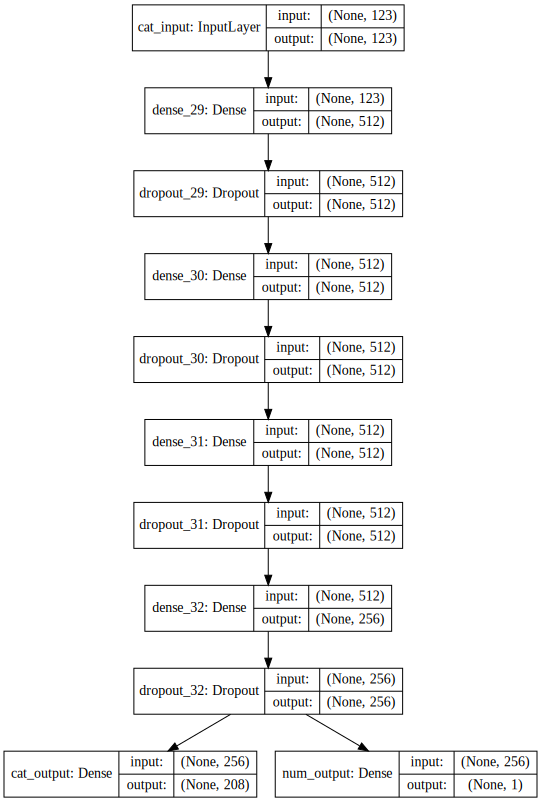

In [47]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [721]:
Xnew2 = np.array([x_train_cat[19]])

Xnew1 = np.array([x_train_num[19]])


# make a prediction
ynew = model.predict({'cate_input':Xnew2,'num_input':Xnew1})

# show the inputs and predicted outputs
print("X=%s, Predicted=%s" % (Xnew1[0],  ynew ))

X=[1 8 0 7 0], Predicted=[[0.86509156 7.7890024  0.33240092 6.5731373  0.        ]]


## 예전에 사용한 모델 데이터들

In [259]:
model = Model(inputs=[num_input, cat_input], outputs=[num_output, cat_output])

In [260]:
model.compile(optimizer='rmsprop',
              loss={'num_output':'mse', 'cat_output':'categorical_crossentropy'},
              metrics=['accuracy'])

In [261]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00000001)

callbacks = [
    learning_rate_reduction, # learning_rate를 점차 감소시킴으로서 최적값에 접근하는 방식
                                        # approach to get optimal value by gradually decreasing learning_rate
    EarlyStopping('val_loss', patience=3), # val_loss이 최적값에서 멀어지는 순간 epoch가 남아도 학습 중지
                                                            # If val_loss deviates from the optimal value, 
                                                            # learning stops even if epoch remains.
    ModelCheckpoint('model.h5', save_best_only=True)] # 모델을 학습시키면서 지금까지 등장했던 최적의 weight들을 항상 저장한다.


hist = model.fit({'num_input':x_train_num, 'cat_input':x_train_cat}, {'num_output': y_train_num, 'cat_output':x_train_cat}, epochs=50, batch_size=64, callbacks=callbacks, validation_split=0.1,)

Train on 22533 samples, validate on 2504 samples
Epoch 1/50
22533/22533 [==============================] - 1s 64us/step - loss: 399.6520 - num_output_loss: 0.2217 - cat_output_loss: 399.4303 - num_output_acc: 0.6617 - cat_output_acc: 0.9598 - val_loss: 380.0138 - val_num_output_loss: 0.0705 - val_cat_output_loss: 379.9433 - val_num_output_acc: 1.0000 - val_cat_output_acc: 0.9800


/usr/local/lib/python3.5/dist-packages/keras/callbacks.py:1043: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: loss,val_cat_output_acc,num_output_loss,cat_output_loss,val_loss,val_cat_output_loss,val_num_output_loss,lr,cat_output_acc,val_num_output_acc,num_output_acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Epoch 2/50
22533/22533 [==============================] - 1s 49us/step - loss: 347.3038 - num_output_loss: 0.0906 - cat_output_loss: 347.2132 - num_output_acc: 0.6040 - cat_output_acc: 0.9814 - val_loss: 341.4980 - val_num_output_loss: 0.1200 - val_cat_output_loss: 341.3780 - val_num_output_acc: 1.0000 - val_cat_output_acc: 0.9800
Epoch 3/50
22533/22533 [==============================] - 1s 52us/step - loss: 329.4858 - num_output_loss: 0.0844 - cat_output_loss: 329.4014 - num_output_acc: 0.7987 - cat_output_acc: 0.9824 - val_loss: 332.0796 - val_num_output_loss: 0.0784 - val_cat_output_loss: 332.0012 - val_num_output_acc: 0.2716 - val_cat_output_acc: 0.9856
Epoch 4/50
22533/22533 [==============================] - 1s 51us/step - loss: 315.3419 - num_output_loss: 0.0825 - cat_output_loss: 315.2594 - num_output_acc: 0.8714 - cat_output_acc: 0.9835 - val_loss: 312.8341 - val_num_output_loss: 0.3030 - val_cat_output_loss: 312.5311 - val_num_output_acc: 0.2716 - val_cat_output_acc: 0.9768
E

In [262]:
loss_and_metrics = model.evaluate({'num_input':x_train_num, 'cat_input':x_train_cat}, {'num_output': y_train_num, 'cat_output':x_train_cat}, batch_size=32)
print(loss_and_metrics)
print(loss_and_metrics[0])
print(loss_and_metrics[1] * 100)

25037/25037 [==============================] - 1s 39us/step
[307.81578775862897, 0.07099316146763511, 307.74479453636155, 1.0, 0.990094659903343]
307.81578775862897
7.099316146763511


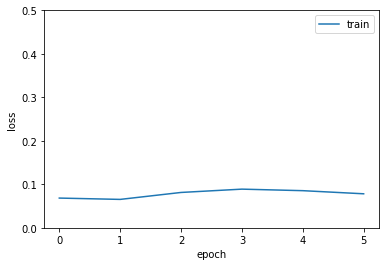

In [723]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.ylim(0.0, 0.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()